In [1]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
from sklearn.model_selection import train_test_split

# Remove Duplicates

In [4]:
# Load the CSV file
file_path = "Karnataka_Datasets/Ramanagara/Ramanagara.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Remove duplicate rows
df = df.drop_duplicates()

# Save it back to the same file
df.to_csv(file_path, index=False)

print("Duplicate rows removed and file updated successfully.")

Duplicate rows removed and file updated successfully.


# Mapping Points to Districts

In [6]:
districts = gpd.read_file("Karnataka_Datasets/Indian_districts_boundary.shp")

In [8]:
# Step 2: Load the CSV file (latitude and longitude points)
points_df = pd.read_csv("Karnataka_Datasets/Crops_Karnataka.csv")

# Ensure the CSV contains 'latitude' and 'longitude' columns
if not {'latitude', 'longitude'}.issubset(points_df.columns):
    raise ValueError("CSV must contain 'latitude' and 'longitude' columns.")

# Step 3: Convert points to a GeoDataFrame
geometry = [Point(xy) for xy in zip(points_df['longitude'], points_df['latitude'])]
points_gdf = gpd.GeoDataFrame(points_df, geometry=geometry, crs=districts.crs)

# Step 4: Perform spatial join to find districts for each point
result = gpd.sjoin(points_gdf, districts, how="left", predicate="intersects")

# Step 5: Save the result to a new CSV
result.to_csv("Karnataka_Datasets/Crops_Karnataka_With_Districts.csv", index=False)

print("Spatial join completed. Output saved to 'output_with_districts.csv'.")

Spatial join completed. Output saved to 'output_with_districts.csv'.


# Removing Unnecessary Columns

In [11]:
import pandas as pd

# Load the CSV file
file_path = "Karnataka_Datasets/Crops_Karnataka_With_Districts.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# List of columns to remove
columns_to_remove = ["CropSurveyDate","Crop_Extent","District_Name","District_code",
                     "Hobli_Name","Hobli_code","Image_url","Month","Season","Season_code","Survey_id",
                     "Taluk_Name","Taluk_code","Village_Name","Village_code","Weekname","Year_code","Years",
                     "index_right","snippet","visibility","extrude","descriptio","tessellate","drawOrder","icon","end","begin",
                     "altitudeMo","timestamp"
]  # Replace with actual column names

# Drop the columns if they exist
df = df.drop(columns=[col for col in columns_to_remove if col in df.columns])

# Save it back to the same file
df.to_csv(file_path, index=False)

print("Unnecessary columns removed and file updated successfully.")


Unnecessary columns removed and file updated successfully.


# Print Count Of Each District

In [12]:

# Load the CSV file
file_path = "Karnataka_Datasets/Crops_Karnataka_With_Districts.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Count occurrences of each unique value in the "Name" column
name_counts = df["Name"].value_counts()

# Print the counts
print(name_counts)


Name
Bangalore          281908
Bangalore Rural     19022
Krishnagiri          5693
Ramanagara            876
Name: count, dtype: int64


# Filter Out Bangalore

In [14]:
import pandas as pd

# Load the CSV file
file_path = "Karnataka_Datasets/Crops_Karnataka_With_Districts.csv"  # Replace with your actual file path
output_file = "Karnataka_Datasets/Crops_Karnataka_Bangalore.csv"  # Specify the new file name

df = pd.read_csv(file_path)

# Filter out rows where Name is "Bangalore"
df = df[df["Name"] == "Bangalore"]

# Save it to a different file
df.to_csv(output_file, index=False)

print(f"Rows with Name = 'Bangalore' have saved to '{output_file}'.")


Rows with Name = 'Bangalore' have saved to 'Karnataka_Datasets/Crops_Karnataka_Bangalore.csv'.


# Keep A Count of Each Cropname

In [56]:

# Load the CSV file
file_path = "Karnataka_Datasets/Bangalore/Sample/SAR_Data_Bangalore_With_Height.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Count occurrences of each unique value in the "Name" column
name_counts = df["height"].value_counts()

# Print the counts
print(name_counts)


height
Long      10909
Low       10902
Medium     8434
Name: count, dtype: int64


# Keep Selective Crops

In [35]:
import pandas as pd

# Load CSV file
file_path = "Karnataka_Datasets/Bangalore/Crops_Karnataka_Bangalore.csv"  # Replace with actual file path
df = pd.read_csv(file_path)
# Define the exact crop mapping based on your specifications
crop_mapping = {
    "Tur (Arhar) (Red Gram)": "Redgram",
    "Maize-H": "Maize",
    "Maize-L": "Maize",
    "Paddy": "Paddy",
    "Bajra": "Bajra",
    "Ragi": "Ragi",
    "Jowar": "Jowar",
    "Coconut": "Coconut",
    "Arecanut": "Arecanut",
    "Banana": "Banana",
    "Potato": "Potato",
    "Wheat": "Wheat"
}

# Define the duration categories
crop_durations = {
    "Ragi": "Low",
    "Jowar": "Medium",
    "Maize": "Medium",
    "Coconut": "Long",
    "Redgram": "Low",
    "Arecanut": "Long",
    "Banana": "Long",
    "Paddy": "Medium",
    "Potato": "Low",
    "Bajra": "Low",
    "Wheat": "Medium"
}

# Function to clean crop names
def clean_crop_name(crop_name):
    # Remove text inside parentheses
    crop_name = re.sub(r"\(.*?\)", "", crop_name).strip()
    
    # Convert 'Crop-H' or 'Crop-L' to 'Crop'
    crop_name = re.sub(r"-[HhLl]$", "", crop_name)
    
    # Standardize names based on dictionary
    return crop_mapping.get(crop_name, None)

# Apply cleaning and filtering
df["Cleaned_Crop"] = df["Cropname"].apply(clean_crop_name)

# Drop rows where crops are not in the mapping
df = df.dropna(subset=["Cleaned_Crop"])

# Add duration column
df["Duration"] = df["Cleaned_Crop"].map(crop_durations)

# Save the cleaned file
df.to_csv("Karnataka_Datasets/Bangalore/Crops_Karnataka_Bangalore_Filtered.csv", index=False)

print("Processing complete! Saved as 'processed_crops.csv'.")


Processing complete! Saved as 'processed_crops.csv'.


# Get A Count of Each Duration Type

In [13]:

# Load the CSV file
file_path = "Karnataka_Datasets/District_Data_NDVI_5Day/Merged/Karnataka_Scaled_Normalized_Mapped.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Count occurrences of each unique value in the "Name" column
name_counts = df["duration_numeric"].value_counts()

# Print the counts
print(name_counts)


duration_numeric
1    9259
3    5944
2    5228
Name: count, dtype: int64


# Sample Random Points

In [39]:

# Load the filtered crops dataset
input_file = "Karnataka_Datasets/Bangalore/Crops_Karnataka_Bangalore_Filtered.csv"  # Use the previously generated file
output_file = "Karnataka_Datasets/Bangalore/Crops_Karnataka_Bangalore_Sampled_On_Duration.csv"  # New file to save the sampled data

df = pd.read_csv(input_file)

# Separate by Duration
df_low = df[df["Duration"] == "Low"]
df_medium = df[df["Duration"] == "Medium"]
df_long = df[df["Duration"] == "Long"]

# Get unique low-duration crop counts
low_crop_counts = df_low["Cropname"].value_counts()

# Define sample size for Low crops
target_low_samples = 11000

# Step 1: Take all samples from small "Low" crops first (excluding Ragi)
small_low_crops = ["Bajra", "Potato", "Redgram"]  # Prioritized small crops
selected_low = []
remaining_samples = target_low_samples

for crop in small_low_crops:
    if crop in low_crop_counts:
        crop_data = df_low[df_low["Cropname"] == crop]
        selected_low.append(crop_data)
        remaining_samples -= len(crop_data)

# Step 2: If space remains, sample proportionally from other Low crops (except Ragi)
other_low_crops = df_low[~df_low["Cropname"].isin(["Ragi"] + small_low_crops)]
if remaining_samples > 0 and not other_low_crops.empty:
    sampled_other = other_low_crops.sample(n=min(remaining_samples, len(other_low_crops)), random_state=42)
    selected_low.append(sampled_other)
    remaining_samples -= len(sampled_other)

# Step 3: If space is still left, add Ragi to reach 11,000
if remaining_samples > 0:
    ragi_sample = df_low[df_low["Cropname"] == "Ragi"].sample(n=remaining_samples, random_state=42)
    selected_low.append(ragi_sample)

# Merge selected low-duration crops
df_low_sampled = pd.concat(selected_low, ignore_index=True)

# Combine all durations together
df_final = pd.concat([df_low_sampled, df_medium, df_long], ignore_index=True)

# Save the final balanced dataset
df_final.to_csv(output_file, index=False)

print(f"Balanced dataset saved to '{output_file}' with improved distribution.")

Balanced dataset saved to 'Karnataka_Datasets/Bangalore/Crops_Karnataka_Bangalore_Sampled_On_Duration.csv' with improved distribution.


# FLATTEN SAR DATA

In [26]:
# Load the CSV file
df = pd.read_csv("Karnataka_Datasets/District_Data_NDVI_5Day/Bangalore_SAR.csv")

# Drop the 'date' column
df = df.drop(columns=["date"])

# Group by (latitude, longitude)

# Flatten VV and VH with dynamic column names
flattened_data = []
for (lat, lon), group in grouped.iterrows():
    new_row = {"latitude": lat, "longitude": lon, "Crop_Name": group["Crop_Name"][0]}
    
    for i, vv in enumerate(group["VV"]):
        new_row[f"VV_{i}"] = vv
    
    for i, vh in enumerate(group["VH"]):
        new_row[f"VH_{i}"] = vh

    flattened_data.append(new_row)

# Convert to DataFrame
flattened_df = pd.DataFrame(flattened_data)

# Save the cleaned file
flattened_df.to_csv("Karnataka_Datasets/District_Data_NDVI_5Day/Bangalore_SAR_flattened.csv", index=False)

print("Processing complete. Saved as 'processed_data.csv'.")


Processing complete. Saved as 'processed_data.csv'.


# PROCESSING SAR FILE

In [27]:

# Load the CSV file
df = pd.read_csv("Karnataka_Datasets/District_Data_NDVI_5Day/Bangalore_SAR_flattened.csv")

# Drop 'Pass_Direction' if it exists
if "Pass_Direction" in df.columns:
    df = df.drop(columns=["Pass_Direction"], errors=ignore)

# Drop all columns where the name matches "n_VV" or "n_VH" with n >= 15
columns_to_drop = [col for col in df.columns if any(col.endswith(f"_{n}") for n in range(15, 1000))]

df = df.drop(columns=columns_to_drop, errors="ignore")

# Save the cleaned file
df.to_csv("Karnataka_Datasets/District_Data_NDVI_5Day/Bangalore_SAR_flattened.csv", index=False)

print("Processing complete. Saved as 'cleaned_data.csv'.")


Processing complete. Saved as 'cleaned_data.csv'.


# Mapping to Numeric Values

In [9]:
import pandas as pd

# Load the CSV file
file_path = "Karnataka_Datasets/Bangalore/SAR_With_Height_And_Duration.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Mapping dictionary
mapping = {'low': 1, 'medium': 2, 'high': 3}

# Apply mapping to create numeric columns
df['height_numeric'] = df['Height'].map(mapping)
df['duration_numeric'] = df['Duration'].map(mapping)

# Save the updated DataFrame back to the CSV file
df.to_csv(file_path, index=False)

print("CSV file updated successfully!")


CSV file updated successfully!


# REMOVING SAME SAR SERIES

In [7]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Katihar/Katihar_SAR.csv")

# Select only VV_0...VV_14 and VH_0...VH_14 columns
feature_cols = [col for col in df.columns if col.startswith("VV_") or col.startswith("VH_")]

# Drop duplicate rows based on these feature columns
df_unique = df.drop_duplicates(subset=feature_cols, keep="first")

# Save the filtered dataset
df_unique.to_csv("Katihar/Katihar_SAR.csv", index=False)

# Print the number of rows removed
print(f"Rows before: {len(df)}, Rows after: {len(df_unique)}, Removed: {len(df) - len(df_unique)}")


Rows before: 21144, Rows after: 21144, Removed: 0


In [12]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Katihar/Katihar_5Day.csv")

# Select only VV_0...VV_14 and VH_0...VH_14 columns
feature_cols = [col for col in df.columns if col.startswith("NDVI")]

# Drop duplicate rows based on these feature columns
df_unique = df.drop_duplicates(subset=feature_cols, keep="first")

# Save the filtered dataset
df_unique.to_csv("Katihar/Katihar_5Day.csv", index=False)

# Print the number of rows removed
print(f"Rows before: {len(df)}, Rows after: {len(df_unique)}, Removed: {len(df) - len(df_unique)}")


Rows before: 17134, Rows after: 15511, Removed: 1623


# REMOVING SAME LAT_LONG PAIR

In [10]:
# Load your CSV file
file_path = "Katihar/Katihar_NDVI.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Count the number of rows before removing duplicates
initial_count = len(df)

# Remove duplicate latitude-longitude pairs (keeping the first occurrence)
df_cleaned = df.drop_duplicates(subset=["latitude", "longitude"], keep="first")

# Count the number of rows after removing duplicates
final_count = len(df_cleaned)

# Save back to the original file (overwrite)
df_cleaned.to_csv(file_path, index=False)

# Print debug statement
print(f"Duplicate latitude-longitude pairs removed: {initial_count - final_count}")
print("File updated successfully.")

Duplicate latitude-longitude pairs removed: 38856
File updated successfully.


# Print Uniqe Crop Names

In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Karnataka_Datasets/District_Data_NDVI_5Day/Merged/Karnataka_Scaled_Normalized.csv")  # Replace with your actual file path

# Print unique Crop_Name values
print(df["Crop_Name"].unique())


['Ragi' 'Eucalyptus' 'Maize' 'Coconut' 'Rose' 'HariMirch' 'Eknayaka'
 'Chow Chow' 'Beans' 'Ridgegourd' 'Banana' 'Jowar' 'Marigold' 'Gerbera'
 'Chrysanthemum' 'Tomato' 'Horsegram' 'Avare' 'Coriander' 'Silver Oak'
 'Neem' 'Guava' 'Dahlia' 'Redgram' 'Paddy' 'Trees' 'Elephantfoot_Yam'
 'Malabar Neem' 'Sweetcorn' 'Cucumber' 'Potato' 'Carrot' 'Mangoes'
 'Makkachari' 'Flower' 'Cabbage' 'Asparagus' 'Teak' 'Drumstick'
 'Vegetables' 'Beetroot' 'Cauliflower' 'Mint' 'Methi Leaves' 'Dill' 'Noni'
 'Ivygourd' 'Bajra' 'Brinjal' 'Bottlegourd' 'Green Fodder' 'Acacia'
 'Arecanut' 'Papaya' 'Chiku' 'Fruits' 'Bhindi' 'Spinach' 'Grapes' 'Fennel'
 'Capsicum' 'Bittergourd' 'Mulberry' 'Knolkhol' 'Crossandra' 'Agaves'
 'Gladiolus' 'Wheat' 'BlackPepper' 'Groundnut' 'Barley' 'Tuberose' 'Lemon'
 'Sugarcane' 'Peas' 'Indigo' 'China Aster' 'LadyFinger' 'Vegetable Cowpea'
 'Harimirch' 'Dhavana' 'Tamarind' 'Turmeric' 'Cowpea' 'Dolichuous_Bean'
 'Pumpkin' 'Broccoli' 'Sunflower' 'Sweet Corn' 'Rose Wood' 'Baby Corn'
 'Ging

In [13]:
import pandas as pd

# ✅ Step 1: Load the CSV file
input_file = "Katihar/Katihar_5Day.csv"  # Replace with the path to your CSV file
df = pd.read_csv(input_file)

# ✅ Step 2: Define the DN to Crop_Name mapping
dn_to_crop = {
    1: "Wheat",
    2: "Mustard",
    3: "Lentil",
    4: "No Crop/Fallow",
    5: "Green pea",
    6: "Sugarcane",
    8: "Garlic",
    9: "Maize",
    13: "Gram",
    14: "Coriander",
    15: "Potato",
    16: "Bersem",
    36: "Rice"
}

# ✅ Step 3: Create a new column 'Crop_Name' based on the 'DN' column
df['Crop_Name'] = df['DN'].map(dn_to_crop)

# ✅ Step 4: Save the updated DataFrame back to the same file
df.to_csv(input_file, index=False)
print(f"✅ New 'Crop_Name' column added, and file saved to {input_file}")


✅ New 'Crop_Name' column added, and file saved to Katihar/Katihar_5Day.csv


# Height and Duration Mapping

In [14]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('Katihar/Katihar_5Day.csv')

crop_mapping = {
    'Bajra': ('Short', 'Low'),
    'Banana': ('Tall', 'Long'),
    'Coconut': ('Tall', 'Long'),
    'Jowar': ('Medium', 'Low'),
    'Maize': ('Medium', 'Medium'),
    'Paddy': ('Short', 'Medium'),
    'Potato': ('Short', 'Medium'),
    'Ragi': ('Short', 'Low'),
    'Redgram': ('Medium', 'Medium'),
    'Wheat': ('Short', 'Low'),
    'Eucalyptus': ('Tall', 'Long'),
    'Rose': ('Short', 'Medium'),
    'HariMirch': ('Short', 'Low'),
    'Eknayaka': ('Short', 'Medium'),
    'Chow Chow': ('Medium', 'Medium'),
    'Beans': ('Short', 'Low'),
    'Ridgegourd': ('Medium', 'Medium'),
    'Bottlegourd': ('Medium', 'Medium'),
    'Marigold': ('Short', 'Medium'),
    'Gerbera': ('Short', 'Medium'),
    'Chrysanthemum': ('Short', 'Medium'),
    'Tomato': ('Short', 'Medium'),
    'Horsegram': ('Medium', 'Medium'),
    'Avare': ('Medium', 'Medium'),
    'Coriander': ('Short', 'Low'),
    'Silver Oak': ('Tall', 'Long'),
    'Neem': ('Tall', 'Long'),
    'Guava': ('Medium', 'Long'),
    'Dahlia': ('Short', 'Medium'),
    'Trees': ('Tall', 'Long'),
    'Elephantfoot_Yam': ('Medium', 'Long'),
    'Malabar Neem': ('Tall', 'Long'),
    'Sweetcorn': ('Medium', 'Medium'),
    'Cucumber': ('Medium', 'Medium'),
    'Carrot': ('Short', 'Medium'),
    'Mangoes': ('Tall', 'Long'),
    'Makkachari': ('Short', 'Low'),
    'Flower': ('Short', 'Medium'),
    'Cabbage': ('Short', 'Medium'),
    'Asparagus': ('Short', 'Medium'),
    'Teak': ('Tall', 'Long'),
    'Drumstick': ('Medium', 'Long'),
    'Vegetables': ('Short', 'Medium'),
    'Beetroot': ('Short', 'Medium'),
    'Cauliflower': ('Short', 'Medium'),
    'Mint': ('Short', 'Low'),
    'Methi Leaves': ('Short', 'Low'),
    'Dill': ('Short', 'Low'),
    'Noni': ('Medium', 'Long'),
    'Ivygourd': ('Medium', 'Medium'),
    'Brinjal': ('Short', 'Medium'),
    'Green Fodder': ('Medium', 'Medium'),
    'Acacia': ('Tall', 'Long'),
    'Arecanut': ('Tall', 'Long'),
    'Papaya': ('Medium', 'Long'),
    'Chiku': ('Tall', 'Long'),
    'Fruits': ('Medium', 'Long'),
    'Spinach': ('Short', 'Low'),
    'Grapes': ('Medium', 'Long'),
    'Fennel': ('Short', 'Low'),
    'Capsicum': ('Short', 'Medium'),
    'Bittergourd': ('Medium', 'Medium'),
    'Mulberry': ('Medium', 'Long'),
    'Knolkhol': ('Short', 'Medium'),
    'Crossandra': ('Short', 'Medium'),
    'Agaves': ('Tall', 'Long'),
    'Gladiolus': ('Short', 'Medium'),
    'BlackPepper': ('Tall', 'Long'),
    'Groundnut': ('Short', 'Long'),
    'Barley': ('Short', 'Low'),
    'Tuberose': ('Short', 'Medium'),
    'Lemon': ('Medium', 'Long'),
    'Sugarcane': ('Tall', 'Long'),
    'Peas': ('Short', 'Medium'),
    'Indigo': ('Medium', 'Medium'),
    'China Aster': ('Short', 'Medium'),
    'LadyFinger': ('Short', 'Medium'),
    'Vegetable Cowpea': ('Short', 'Low'),
    'Harimirch': ('Short', 'Low'),
    'Dhavana': ('Short', 'Low'),
    'Tamarind': ('Tall', 'Long'),
    'Turmeric': ('Short', 'Long'),
    'Cowpea': ('Short', 'Low'),
    'Dolichuous_Bean': ('Medium', 'Medium'),
    'Pumpkin': ('Medium', 'Medium'),
    'Broccoli': ('Short', 'Medium'),
    'Sunflower': ('Medium', 'Medium'),
    'Sweet Corn': ('Medium', 'Medium'),
    'Rose Wood': ('Tall', 'Long'),
    'Baby Corn': ('Medium', 'Low'),
    'Ginger': ('Short', 'Long'),
    'Sweet Potato': ('Short', 'Long'),
    'Shimp Nut': ('Medium', 'Medium'),
    'Snakegourd': ('Medium', 'Medium'),
    'Pomegranate': ('Medium', 'Long'),
    'Jamun': ('Tall', 'Long'),
    'Greengram': ('Short', 'Low'),
    'Cashewnuts': ('Tall', 'Long'),
    'Saffron': ('Short', 'Low'),
    'Chive': ('Short', 'Low'),
    'Mahagani Tree': ('Tall', 'Long'),
    'Casuarina Tree': ('Tall', 'Long'),
    'Bluegrapes': ('Medium', 'Long'),
    'Jasmine Pubescens': ('Short', 'Medium'),
    'Gram': ('Short', 'Low'),
    'Grapes Seedless': ('Medium', 'Long'),
    'Ashgourd': ('Medium', 'Medium'),
    'Nigerseed': ('Short', 'Low'),
    'Jackfruit': ('Tall', 'Long'),
    'Sandalwood': ('Tall', 'Long'),
    'Linseed': ('Short', 'Low'),
    'Curry Leaves': ('Short', 'Low'),
    'Wheat': ('Short', 'Low'),
    'Mustard': ('Short', 'Low'),
    'Maize': ('Medium', 'Medium'),
    'Sugarcane': ('Tall', 'Long'),
    'Lentil': ('Short', 'Medium'),
    'Rice': ('Short', 'Medium'),
    'Gram': ('Short', 'Low'),
    'Garlic': ('Short', 'Medium'),
    'Potato': ('Short', 'Medium'),
    'Green pea': ('Short', 'Medium'),
    'Bersem': ('Short', 'Medium'),
    'Coriander': ('Short', 'Low'),
}



height_mapping = {'Short': 1, 'Medium': 2, 'Tall': 3}
duration_mapping = {'Low': 1, 'Medium': 2, 'Long': 3}

# Apply the mapping to the DataFrame
df[['Height', 'Duration']] = df['Crop_Name'].map(crop_mapping).apply(pd.Series)
df['height_numeric'] = df['Height'].map(height_mapping)
df['duration_numeric'] = df['Duration'].map(duration_mapping)

# Save the updated DataFrame
df.to_csv('Katihar/Katihar_5Day.csv', index=False)

print("File updated successfully.")


File updated successfully.


In [14]:
# Load the CSV file
df = pd.read_csv("Karnataka_Datasets/Agrifield/Agrifield_SAR_NDVI.csv")  # Replace with your actual file path

# Count occurrences of each unique value in 'duration_numeric' column
value_counts = df['duration_numeric'].value_counts()

# Print the result
print(value_counts)

duration_numeric
1    2806
2     601
3     164
Name: count, dtype: int64


In [5]:
# Load the CSV file
df = pd.read_csv("Karnataka_Datasets/Bangalore/SAR_Optical_test.csv")  # Replace with your actual file path

# Count occurrences of each unique value in 'duration_numeric' column
value_counts = df['duration_numeric'].value_counts()

# Print the result
print(value_counts)

duration_numeric
1    2173
3    1728
2    1183
Name: count, dtype: int64


# Train Test Split

In [15]:
# Load the CSV file
df = pd.read_csv("Karnataka_Datasets/Bangalore/SAR_With_Height_And_Duration.csv")

# Create empty DataFrames for train and test
train_df = pd.DataFrame()
test_df = pd.DataFrame()

# Perform 80-20 split for each unique Crop_Name
for crop in df["Crop_Name"].unique():
    crop_data = df[df["Crop_Name"] == crop]  # Filter rows for this crop
    train, test = train_test_split(crop_data, test_size=0.2, random_state=42)  # 80-20 split
    train_df = pd.concat([train_df, train])  # Append to train DataFrame
    test_df = pd.concat([test_df, test])  # Append to test DataFrame

# Save the train and test DataFrames
train_df.to_csv("Karnataka_Datasets/Bangalore/SAR_train.csv", index=False)
test_df.to_csv("Karnataka_Datasets/Bangalore/SAR_test.csv", index=False)

print("Train and test datasets saved successfully!")


Train and test datasets saved successfully!


# RENAME NDVI COLUMNS

In [3]:
import pandas as pd

# Input and output file paths
input_file = "Karnataka_Datasets/Bangalore/SAR_Optical_train.csv"  # Replace with your actual file path
output_file = "Karnataka_Datasets/Bangalore/SAR_Optical_train.csv"  # Output file name

# Read the CSV file
df = pd.read_csv(input_file)

# Function to rename columns
def rename_columns(col):
    if "_gapfilled_NDVI_lsc" in col:  # Ensure only matching columns are renamed
        parts = col.split("_")  # Split column name by underscores
        return f"NDVI_{parts[0]}"  # Format as NDVI_Number
    return col  # Keep other columns unchanged

# Apply renaming to all columns
df.columns = [rename_columns(col) for col in df.columns]

# Save the modified DataFrame
df.to_csv(output_file, index=False)

print(f"Renamed file saved as: {output_file}")


Renamed file saved as: Karnataka_Datasets/Bangalore/SAR_Optical_train.csv


# VV-VH Plots

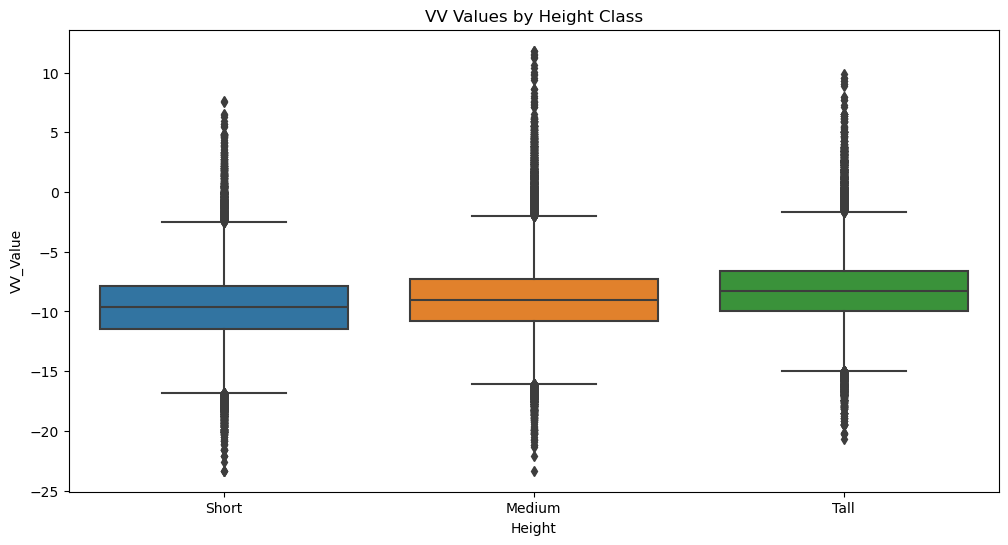

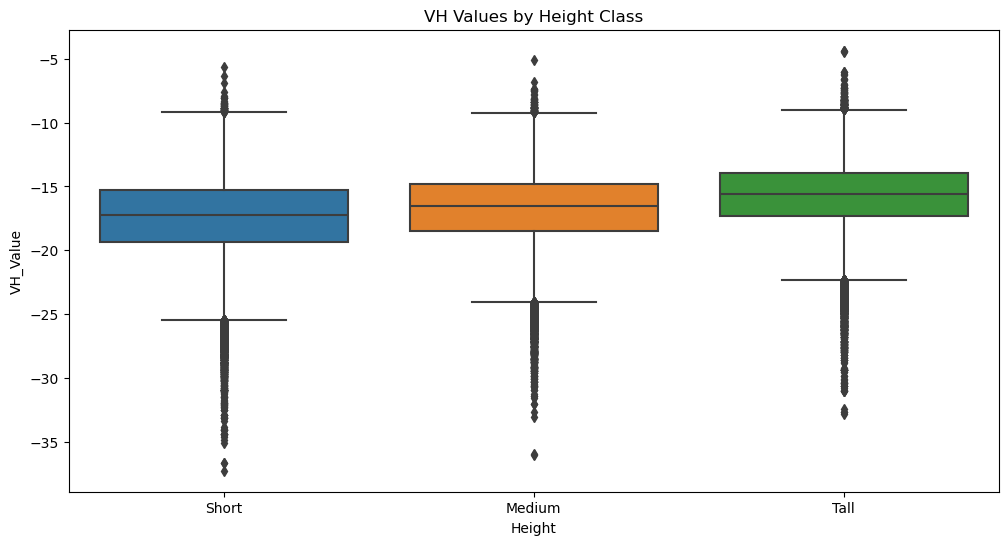

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file
df = pd.read_csv('Karnataka_Datasets/Bangalore/SAR_Optical_train.csv')

# Identify VV and VH columns
vv_columns = [col for col in df.columns if col.startswith('VV_')]
vh_columns = [col for col in df.columns if col.startswith('VH_')]

# Melt the data for VV and VH to long format for box plotting
vv_melted = pd.melt(df, id_vars=['Height'], value_vars=vv_columns, var_name='VV_Time', value_name='VV_Value')
vh_melted = pd.melt(df, id_vars=['Height'], value_vars=vh_columns, var_name='VH_Time', value_name='VH_Value')

# Plot VV Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=vv_melted, x='Height', y='VV_Value')
plt.title('VV Values by Height Class')
plt.show()

# Plot VH Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=vh_melted, x='Height', y='VH_Value')
plt.title('VH Values by Height Class')
plt.show()


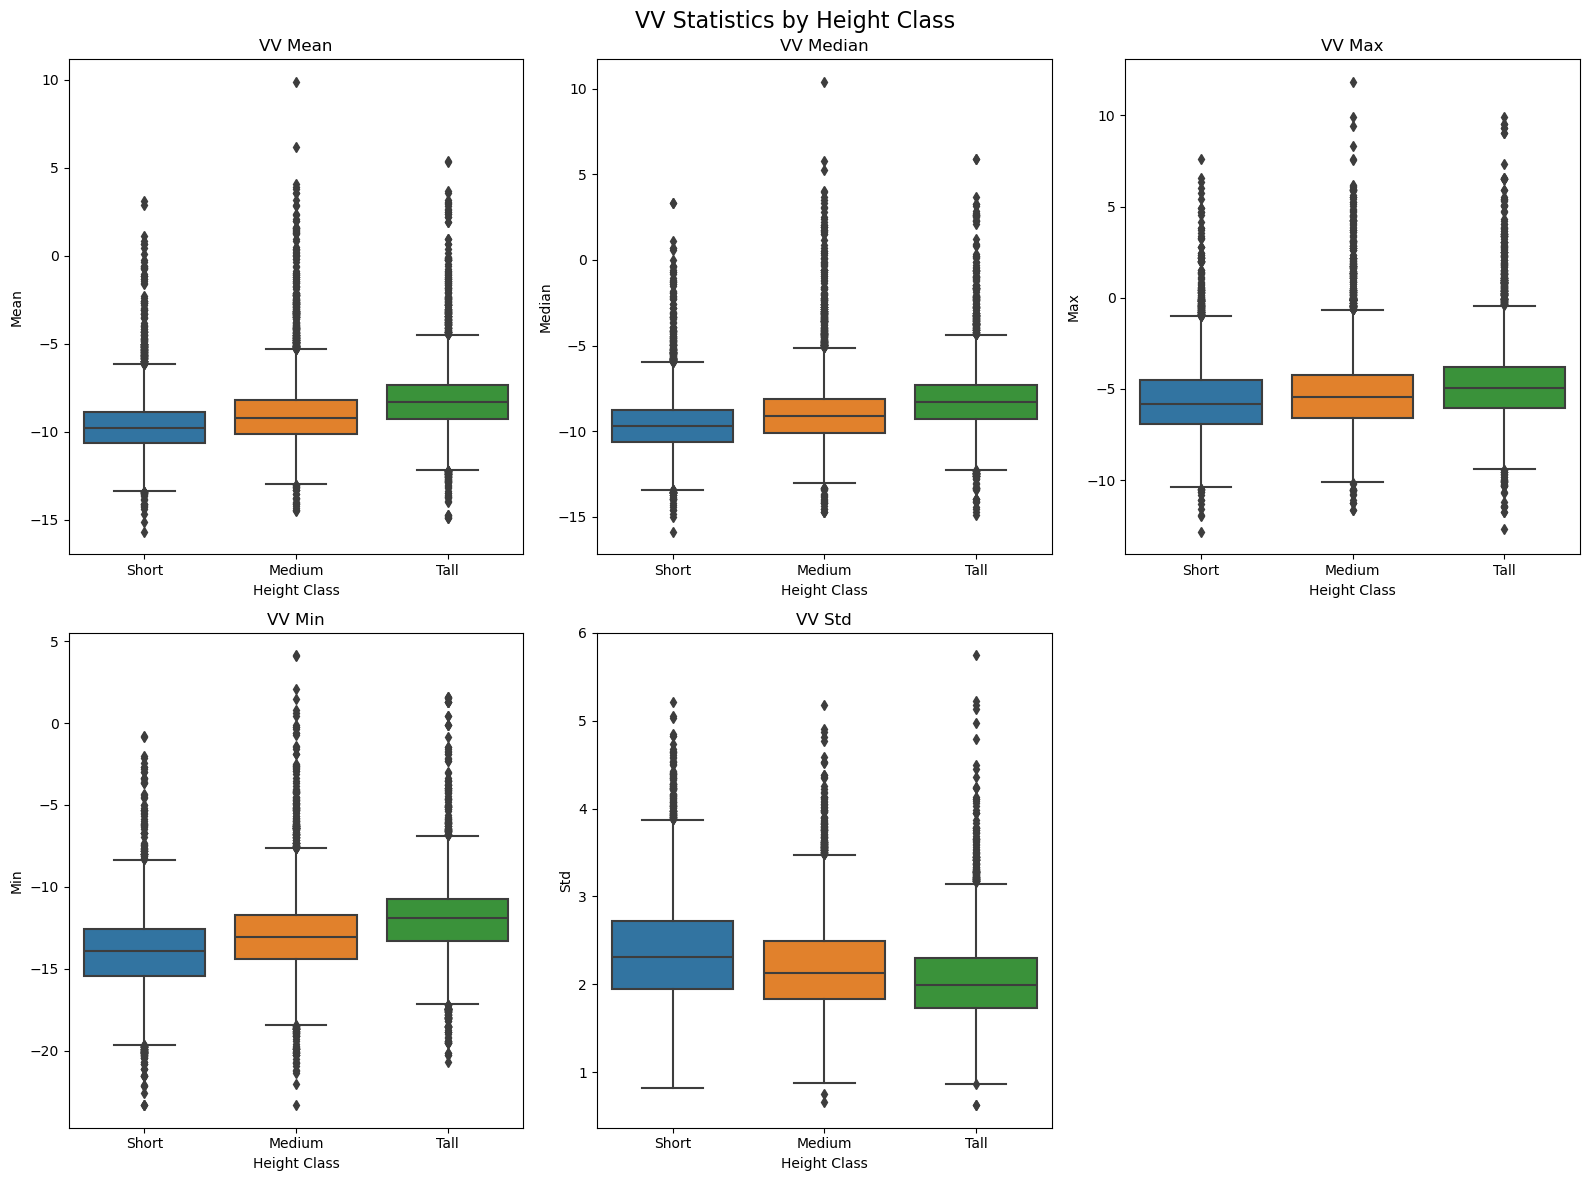

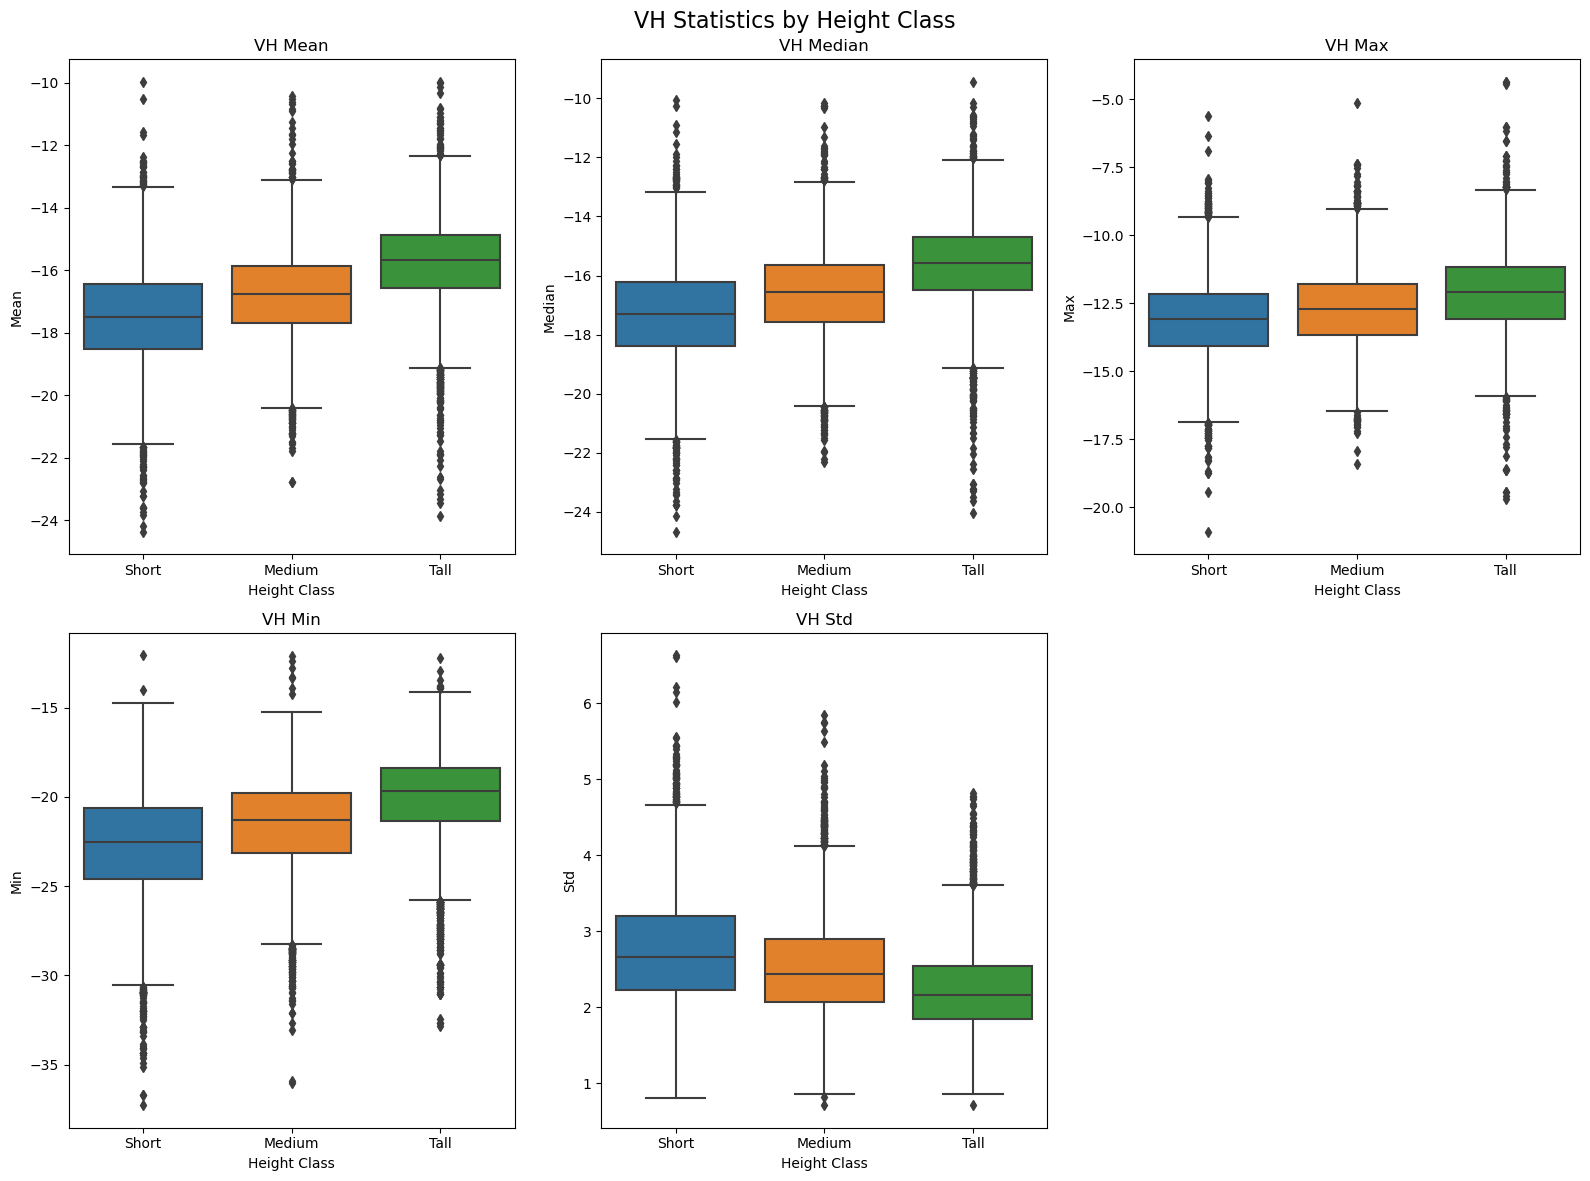

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load CSV ===
file_path = 'Karnataka_Datasets/Bangalore/SAR_Optical_train.csv'
df = pd.read_csv(file_path)

# === Identify VV and VH features ===
vv_cols = [col for col in df.columns if col.startswith('VV_')]
vh_cols = [col for col in df.columns if col.startswith('VH_')]

# === Calculate row-wise stats ===
row_stats = ['mean', 'median', 'max', 'min', 'std']
for stat in row_stats:
    df[f'VV_{stat}'] = df[vv_cols].agg(stat, axis=1)
    df[f'VH_{stat}'] = df[vh_cols].agg(stat, axis=1)

# === Group by Height and calculate stats over row-wise results ===
summary_vv = df.groupby('Height')[[f'VV_{s}' for s in row_stats]].agg(row_stats)
summary_vh = df.groupby('Height')[[f'VH_{s}' for s in row_stats]].agg(row_stats)

# === Plot VV Statistics ===
plt.figure(figsize=(16, 12))
plt.suptitle('VV Statistics by Height Class', fontsize=16)
for i, stat in enumerate(row_stats, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Height', y=f'VV_{stat}', data=df)
    plt.title(f'VV {stat.capitalize()}')
    plt.xlabel('Height Class')
    plt.ylabel(stat.capitalize())

plt.tight_layout()
plt.show()

# === Plot VH Statistics ===
plt.figure(figsize=(16, 12))
plt.suptitle('VH Statistics by Height Class', fontsize=16)
for i, stat in enumerate(row_stats, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Height', y=f'VH_{stat}', data=df)
    plt.title(f'VH {stat.capitalize()}')
    plt.xlabel('Height Class')
    plt.ylabel(stat.capitalize())

plt.tight_layout()
plt.show()


# Creating Statistics Data

In [11]:
import pandas as pd

# === Load CSV ===
file_path = 'Karnataka_Datasets/Bangalore/SAR_test.csv'
df = pd.read_csv(file_path)
# === Identify VV and VH features ===
vv_cols = [col for col in df.columns if col.startswith('VV_')]
vh_cols = [col for col in df.columns if col.startswith('VH_')]

# === Calculate row-wise stats ===
row_stats = ['mean', 'median', 'max', 'min', 'std']
for stat in row_stats:
    df[f'VV_{stat}'] = df[vv_cols].agg(stat, axis=1)
    df[f'VH_{stat}'] = df[vh_cols].agg(stat, axis=1)

# === Drop VV and VH time-series columns ===
df.drop(columns=vv_cols + vh_cols, inplace=True)
print(df)
# === Save to a new CSV ===
output_path = 'Karnataka_Datasets/Bangalore/SAR_test_statistics.csv'
df.to_csv(output_path, index=False)

print(f"New CSV with statistics saved as: {output_path}")


       latitude  longitude Crop_Name Height Duration  height_numeric  \
0     12.766049  77.765136      Ragi  Short   Medium               1   
1     13.156820  77.519172      Ragi  Short   Medium               1   
2     12.808336  77.497338      Ragi  Short   Medium               1   
3     12.910950  77.732452      Ragi  Short   Medium               1   
4     12.758076  77.637523      Ragi  Short   Medium               1   
...         ...        ...       ...    ...      ...             ...   
5079  12.800631  77.523820     Bajra  Short      Low               1   
5080  12.767537  77.741466     Bajra  Short      Low               1   
5081  12.865479  77.716389     Wheat  Short   Medium               1   
5082  12.841026  77.487563     Wheat  Short   Medium               1   
5083  13.057083  77.693425     Wheat  Short   Medium               1   

      duration_numeric    VV_mean    VH_mean  VV_median  VH_median    VV_max  \
0                    2 -10.888410 -18.069329 -10.997230

In [15]:
import pandas as pd

# Load the CSV file
input_file = "Karnataka_Datasets/Krishnagiri/Clean/Krishnagiri_With_SAR.csv"  # Replace with your file path
crop_column = "Crop_Name"  # Update if your column name is different

# Read the CSV
df = pd.read_csv(input_file)

# Get unique crop names (ignoring NaNs)
unique_crops = df[crop_column].dropna().unique()

# Print the total count of unique crops
total_unique_crops = len(unique_crops)
print(f"Total unique crops: {total_unique_crops}")


Total unique crops: 70


In [18]:
import pandas as pd

# Load the first CSV and extract unique Crop_Names
file1 = "Karnataka_Datasets/Bangalore/SAR_Optical_train.csv"
df1 = pd.read_csv(file1)
unique_crops = df1["Crop_Name"].unique().tolist()

# Load the second CSV and filter rows based on unique Crop_Names
file2 = "Karnataka_Datasets/Rural/Clean/Rural_With_SAR.csv"
df2 = pd.read_csv(file2)
filtered_df = df2[df2["Crop_Name"].isin(unique_crops)]

# Save the filtered data to a new CSV
output_file = "Karnataka_Datasets/Rural/Clean/Rural_Clean_With_SAR.csv"
filtered_df.to_csv(output_file, index=False)

print(f"Filtered data saved to {output_file}")


Filtered data saved to Karnataka_Datasets/Rural/Clean/Rural_Clean_With_SAR.csv


In [1]:
import os
import pandas as pd
import ast  # To convert string representation of list to actual list

# Define input and output directories
input_dir = "Karnataka_Datasets/District_Data_5Day/"
output_dir = "Karnataka_Datasets/District_Data_NDVI_5Day/"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each CSV file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_dir, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Convert NDVI_TimeSeries from string to list (if it's stored as a string)
        df['NDVI_TimeSeries'] = df['NDVI_TimeSeries'].apply(ast.literal_eval)

        # Expand NDVI_TimeSeries into multiple columns
        ndvi_df = pd.DataFrame(df['NDVI_TimeSeries'].tolist(), index=df.index)
        ndvi_df.columns = [f'NDVI_{i+1}' for i in range(ndvi_df.shape[1])]

        # Merge with original DataFrame (excluding the old NDVI_TimeSeries column)
        df = df.drop(columns=['NDVI_TimeSeries']).join(ndvi_df)

        # Save the updated CSV file
        output_path = os.path.join(output_dir, filename)
        df.to_csv(output_path, index=False)

        print(f"Processed: {filename}")


Processed: Bangalore_5Day.csv
Processed: Bangalore_Rural_5Day.csv
Processed: Krishnagiri_5Day.csv
Processed: Ramanagara_5Day.csv


In [14]:
import pandas as pd

# Load CSV file
df = pd.read_csv("Karnataka_Datasets/Agrifield_SAR.csv")

# Convert 'date' to datetime format with error handling
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y", dayfirst=True, errors='coerce')

# Filter only the descending orbit data (handling case sensitivity and whitespace)
df = df[df['Orbit'].str.strip().str.lower() == 'descending']

# Drop rows with missing dates after conversion
df = df.dropna(subset=['date'])

# Group by Latitude and Longitude
grouped = df.groupby(['Latitude', 'Longitude'])

# Function to resample and flatten the data
def flatten_group(group):
    # Resample at a 12-day interval
    sampled = group.set_index('date').resample('12D').first().dropna().reset_index()

    if sampled.empty:
        return None  # Skip empty groups

    VV_cols = {f'VV_{i+1}': val for i, val in enumerate(sampled['VV'].values)}
    VH_cols = {f'VH_{i+1}': val for i, val in enumerate(sampled['VH'].values)}

    return pd.DataFrame([{**{'Latitude': group['Latitude'].iloc[0], 'Longitude': group['Longitude'].iloc[0]}, **VV_cols, **VH_cols}])

# Apply function to each group
flattened_df = grouped.apply(flatten_group).dropna(how='all')

# Reset index and save
flattened_df.reset_index(drop=True, inplace=True)
flattened_df.to_csv("Karnataka_Datasets/Agrifield_SAR_flat.csv", index=False)

print("Flattened data saved successfully!")


Flattened data saved successfully!


In [5]:
import os
import pandas as pd

# ✅ Step 1: Load & Merge CSV Files
dir_path = "Katihar/Processed/SAR/"
output_file = "Katihar/Katihar_SAR.csv"

# Get all CSV files from the directory
all_files = [os.path.join(dir_path, f) for f in os.listdir(dir_path) if f.endswith(".csv")]

# Read each CSV file into a DataFrame and check for 'DN' column
df_list = []
for f in all_files:
    df = pd.read_csv(f)
    if 'DN' not in df.columns:
        print(f"❌ 'DN' column is missing in {f}!")
    df_list.append(df)

# Merge the DataFrames
merged_df = pd.concat(df_list, ignore_index=True)

print(f"Total CSV files found: {len(all_files)}")
print(f"✅ Merged DataFrame Shape: {merged_df.shape}")
print(f"Columns in merged DataFrame: {merged_df.columns}")

# ✅ Step 2: Debug & Fix Date Column
print("\n🔍 Checking raw 'date' values before conversion...")
print(merged_df['date'].astype(str).unique()[:10])  # Show sample dates

# Clean the date column by removing spaces and junk values
merged_df['date'] = merged_df['date'].astype(str).str.strip()  # Remove spaces
merged_df = merged_df[~merged_df['date'].isin(["", "NULL", "nan"])]  # Remove junk values

# ✅ Step 3: Convert Date with Correct Format
merged_df['date'] = pd.to_datetime(merged_df['date'], format="%Y-%m-%d", errors='coerce')

# ✅ Debug: Show Failed Conversions
failed_dates = merged_df[merged_df['date'].isna()]
print(f"❌ Failed date conversions: {failed_dates['date'].unique()} (count: {len(failed_dates)})")

# ✅ Step 4: Drop Missing Dates
merged_df = merged_df.dropna(subset=['date'])

# ✅ Step 5: Filter Descending Orbit
merged_df['Orbit'] = merged_df['Orbit'].astype(str).str.strip().str.lower()
merged_df = merged_df[merged_df['Orbit'] == 'descending']
print(f"✅ Rows after filtering 'descending' orbit: {merged_df.shape[0]}")

# ✅ Step 6: Group by Latitude and Longitude
grouped = merged_df.groupby(['latitude', 'longitude'])
print(f"✅ Unique (latitude, longitude) pairs: {grouped.ngroups}")

# ✅ Step 7: Resample & Flatten Function
def flatten_group(group):
    # Get the first DN value (since it's constant for the group)
    DN_value = group['DN'].iloc[0]
    
    # Resample the VV and VH columns
    sampled = group.set_index('date').resample('12D').first().dropna().reset_index()
    if sampled.empty:
        return None

    # Extract VV and VH columns
    VV_cols = {f'VV_{i+1}': val for i, val in enumerate(sampled['VV'].values)}
    VH_cols = {f'VH_{i+1}': val for i, val in enumerate(sampled['VH'].values)}

    # Return a flattened DataFrame with DN only once per group
    return pd.DataFrame([{**{'latitude': group['latitude'].iloc[0], 'longitude': group['longitude'].iloc[0], 'DN': DN_value}, 
                          **VV_cols, **VH_cols}])

# ✅ Step 8: Apply Flattening
flattened_df = grouped.apply(flatten_group).dropna(how='all')
print(f"✅ Flattened DataFrame Shape: {flattened_df.shape}")

# ✅ Step 9: Save Output
flattened_df.reset_index(drop=True, inplace=True)
flattened_df.to_csv(output_file, index=False)
print(f"✅ Flattened data saved successfully to {output_file}!")


Total CSV files found: 12
✅ Merged DataFrame Shape: (2452960, 7)
Columns in merged DataFrame: Index(['date', 'VV', 'VH', 'Orbit', 'DN', 'latitude', 'longitude'], dtype='object')

🔍 Checking raw 'date' values before conversion...
['2021-04-08' '2021-04-11' '2021-04-20' '2021-04-23' '2021-05-02'
 '2021-05-05' '2021-05-14' '2021-05-17' '2021-05-26' '2021-05-29']
❌ Failed date conversions: <DatetimeArray>
[]
Length: 0, dtype: datetime64[ns] (count: 0)
✅ Rows after filtering 'descending' orbit: 1372960
✅ Unique (latitude, longitude) pairs: 21144
✅ Flattened DataFrame Shape: (21144, 39)
✅ Flattened data saved successfully to Katihar/Katihar_SAR.csv!


In [6]:
import os
import pandas as pd
import ast

# ✅ Step 1: Load & Merge CSV Files
dir_path = "Katihar/Processed/NDVI/"  # Set your directory path here
output_file = "Katihar/Katihar_NDVI.csv"  # Output file name

# Get all CSV files from the directory
all_files = [os.path.join(dir_path, f) for f in os.listdir(dir_path) if f.endswith(".csv")]

# Read each CSV file and extract relevant columns
df_list = []
for f in all_files:
    df = pd.read_csv(f)
    
    # Extract necessary columns
    relevant_columns = ['Latitude', 'Longitude', 'DN', 'NDVI_TimeSeries']
    if not all(col in df.columns for col in relevant_columns):
        print(f"❌ One or more columns missing in {f}!")
        continue
    
    # Append the DataFrame to the list
    df_list.append(df[relevant_columns])

# Merge the DataFrames
merged_df = pd.concat(df_list, ignore_index=True)

print(f"✅ Merged DataFrame Shape: {merged_df.shape}")
print(f"Columns in merged DataFrame: {merged_df.columns}")

# ✅ Step 2: Process NDVI_TimeSeries
def process_ndvi_timeseries(ndvi_series):
    # Convert the string representation of list into actual list of floats
    try:
        ndvi_list = ast.literal_eval(ndvi_series)
        # Create NDVI_1, NDVI_2, ..., NDVI_n columns
        return {f'NDVI_{i+1}': val for i, val in enumerate(ndvi_list)}
    except Exception as e:
        print(f"❌ Error processing NDVI_TimeSeries: {e}")
        return {}

# Apply processing to each NDVI_TimeSeries and create new columns
ndvi_columns = merged_df['NDVI_TimeSeries'].apply(process_ndvi_timeseries)
ndvi_df = pd.DataFrame(ndvi_columns.tolist(), index=merged_df.index)

# Merge the NDVI columns with the original DataFrame (Latitude, Longitude, DN)
final_df = pd.concat([merged_df[['Latitude', 'Longitude', 'DN']], ndvi_df], axis=1)

# ✅ Step 3: Save the Final DataFrame to CSV
final_df.to_csv(output_file, index=False)
print(f"✅ Merged and processed data saved to {output_file}!")


✅ Merged DataFrame Shape: (60000, 4)
Columns in merged DataFrame: Index(['Latitude', 'Longitude', 'DN', 'NDVI_TimeSeries'], dtype='object')
✅ Merged and processed data saved to Katihar/Katihar_NDVI.csv!


In [11]:
import pandas as pd

# ✅ Step 1: Load the CSV file
input_file = "Katihar/Katihar_5Day.csv"  # Replace with the path to your CSV file
df = pd.read_csv(input_file)

# ✅ Step 2: Remove rows where DN == 4
df_filtered = df[df['DN'] != 4]

# ✅ Step 3: Save the filtered DataFrame back to the same file
df_filtered.to_csv(input_file, index=False)
print(f"✅ Rows with DN == 4 removed, and file saved to {input_file}")


✅ Rows with DN == 4 removed, and file saved to Katihar/Katihar_5Day.csv


In [16]:
import pandas as pd

# Load both datasets
df1 = pd.read_csv("Karnataka_Datasets/Agrifield_SAR_flat.csv")
df2 = pd.read_csv("Karnataka_Datasets/Agrifield.csv")

# Ensure data types are consistent (rounding to 5 or 6 decimal places)
df1['Latitude'] = df1['Latitude'].round(5)
df1['Longitude'] = df1['Longitude'].round(5)
df2['Latitude'] = df2['Latitude'].round(5)
df2['Longitude'] = df2['Longitude'].round(5)

# Ensure no extra whitespace
df1['Latitude'] = df1['Latitude'].astype(str).str.strip().astype(float)
df1['Longitude'] = df1['Longitude'].astype(str).str.strip().astype(float)
df2['Latitude'] = df2['Latitude'].astype(str).str.strip().astype(float)
df2['Longitude'] = df2['Longitude'].astype(str).str.strip().astype(float)

# Merge on Latitude and Longitude
merged_df = pd.merge(df1, df2, on=['Latitude', 'Longitude'], how='inner')

# Save the merged file
merged_df.to_csv("Karnataka_Datasets/Agrifield_SAR_flat.csv", index=False)

print("Merging completed successfully! ✅")


Merging completed successfully! ✅


In [1]:
import pandas as pd

# Load the CSV files
df1 = pd.read_csv("Karnataka_Datasets/Agrifield/Agrifield_SAR_flat.csv")
df2 = pd.read_csv("Karnataka_Datasets/Agrifield/Agrifield_NDVI_flat.csv")

# Ensure data types are consistent (rounding to 5 or 6 decimal places)
df1['Latitude'] = df1['Latitude'].round(5)
df1['Longitude'] = df1['Longitude'].round(5)
df2['Latitude'] = df2['Latitude'].round(5)
df2['Longitude'] = df2['Longitude'].round(5)

# Ensure no extra whitespace
df1['Latitude'] = df1['Latitude'].astype(str).str.strip().astype(float)
df1['Longitude'] = df1['Longitude'].astype(str).str.strip().astype(float)
df2['Latitude'] = df2['Latitude'].astype(str).str.strip().astype(float)
df2['Longitude'] = df2['Longitude'].astype(str).str.strip().astype(float)

# Merge on Latitude and Longitude
merged_df = pd.merge(df1, df2, on=['Latitude', 'Longitude'], how='inner')

# Save the merged file
merged_df.to_csv("Karnataka_Datasets/Agrifield/Agrifield_SAR_NDVI.csv", index=False)

print("Merging completed successfully! ✅")


Merging completed successfully! ✅


In [3]:
import os
import pandas as pd

# Directory containing CSV files
directory = "Karnataka_Districts_15Day/"

# Iterate through each CSV file in the directory
for file in os.listdir(directory):
    if file.endswith(".csv"):
        file_path = os.path.join(directory, file)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Rename only the columns that match the NDVI pattern
        rename_map = {
            col: f"NDVI_{i+1}" 
            for i, col in enumerate(sorted([c for c in df.columns if "_gapfilled_NDVI_lsc" in c], key=lambda x: int(x.split("_")[0])))
        }
        
        df.rename(columns=rename_map, inplace=True)
        
        # Save the updated CSV
        df.to_csv(file_path, index=False)

print("Renaming completed.")


Renaming completed.


In [6]:
import os
import pandas as pd
import re

# Directory containing CSV files
directory = "Karnataka_Districts_15Day/"

# Function to extract the numeric part of column names
def extract_number(col):
    match = re.search(r'_(\d+)$', col)
    return int(match.group(1)) if match else float('inf')

# Iterate through each CSV file in the directory
for file in os.listdir(directory):
    if file.endswith(".csv"):
        file_path = os.path.join(directory, file)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Separate columns into categories
        ndvi_cols = sorted([col for col in df.columns if col.startswith("NDVI_")], key=extract_number)
        vv_cols = sorted([col for col in df.columns if col.startswith("VV_")], key=extract_number)
        vh_cols = sorted([col for col in df.columns if col.startswith("VH_")], key=extract_number)
        other_cols = [col for col in df.columns if not (col.startswith("NDVI_") or col.startswith("VV_") or col.startswith("VH_"))]
        
        # New column order: NDVI → VV → VH → Other
        sorted_columns = other_cols+ ndvi_cols + vv_cols + vh_cols 
        
        # Reorder DataFrame
        df = df[sorted_columns]
        
        # Save the updated CSV
        df.to_csv(file_path, index=False)

print("Column sorting completed.")


Column sorting completed.
